In [138]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
sns.set()

In [139]:
#import data
raw_df = pd.read_csv('country-data.csv')

In [140]:
raw_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [141]:
#check for nulls
raw_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [142]:
#investigating data
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [143]:
raw_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


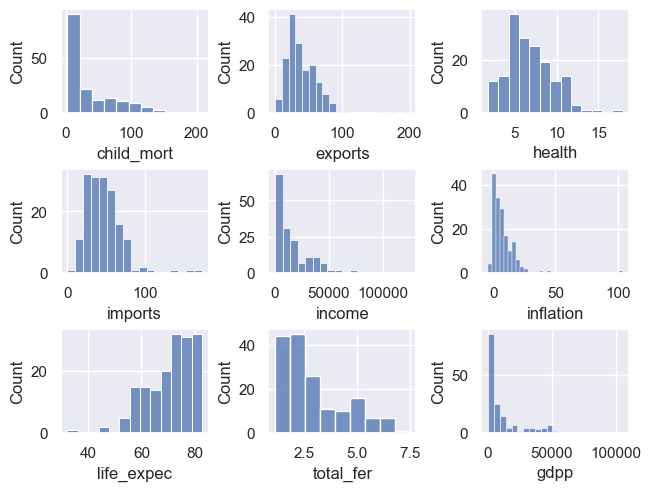

In [144]:
#plotting distributions
fig, ax = plt.subplots(3,3, layout = "constrained")

ax = ax.ravel()

countries = raw_df['country']
raw_df.drop('country', axis = 1, inplace = True)
for i in range(ax.size):
  sns.histplot(raw_df.iloc[:,i], ax = ax[i])

In [145]:
#scaler
scaler = MinMaxScaler()

In [146]:
#apply sacling to the data
scaled_dict = {}
for item in raw_df.columns:
    scaled_dict[item] = np.squeeze(scaler.fit_transform(raw_df[item].values.reshape(-1,1)))

scaled_df = pd.DataFrame(scaled_dict)

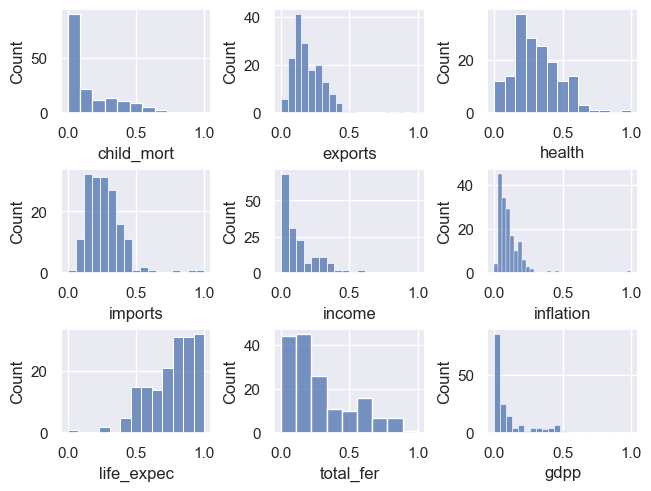

In [147]:
#plotting distributions of scaled data
fig, ax = plt.subplots(3,3, layout = "constrained")

ax = ax.ravel()

for i in range(ax.size):
  sns.histplot(scaled_df.iloc[:,i], ax = ax[i])

For n_clusters = 2 The average silhouette_score is : 0.384471920619431
For n_clusters = 3 The average silhouette_score is : 0.33925909904021984
For n_clusters = 4 The average silhouette_score is : 0.22721503828048864
For n_clusters = 5 The average silhouette_score is : 0.25562045947571244
For n_clusters = 6 The average silhouette_score is : 0.2637149785656022
For n_clusters = 7 The average silhouette_score is : 0.260992338016605
For n_clusters = 8 The average silhouette_score is : 0.27352734115447147


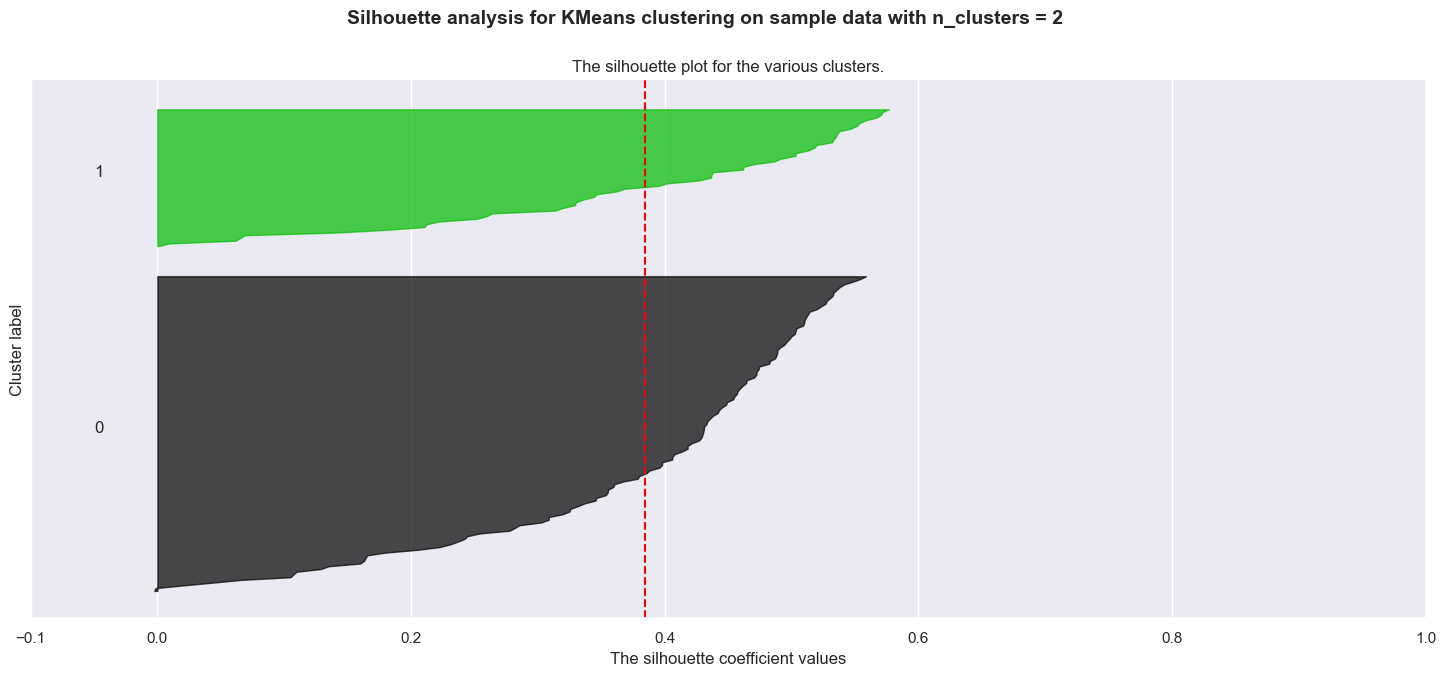

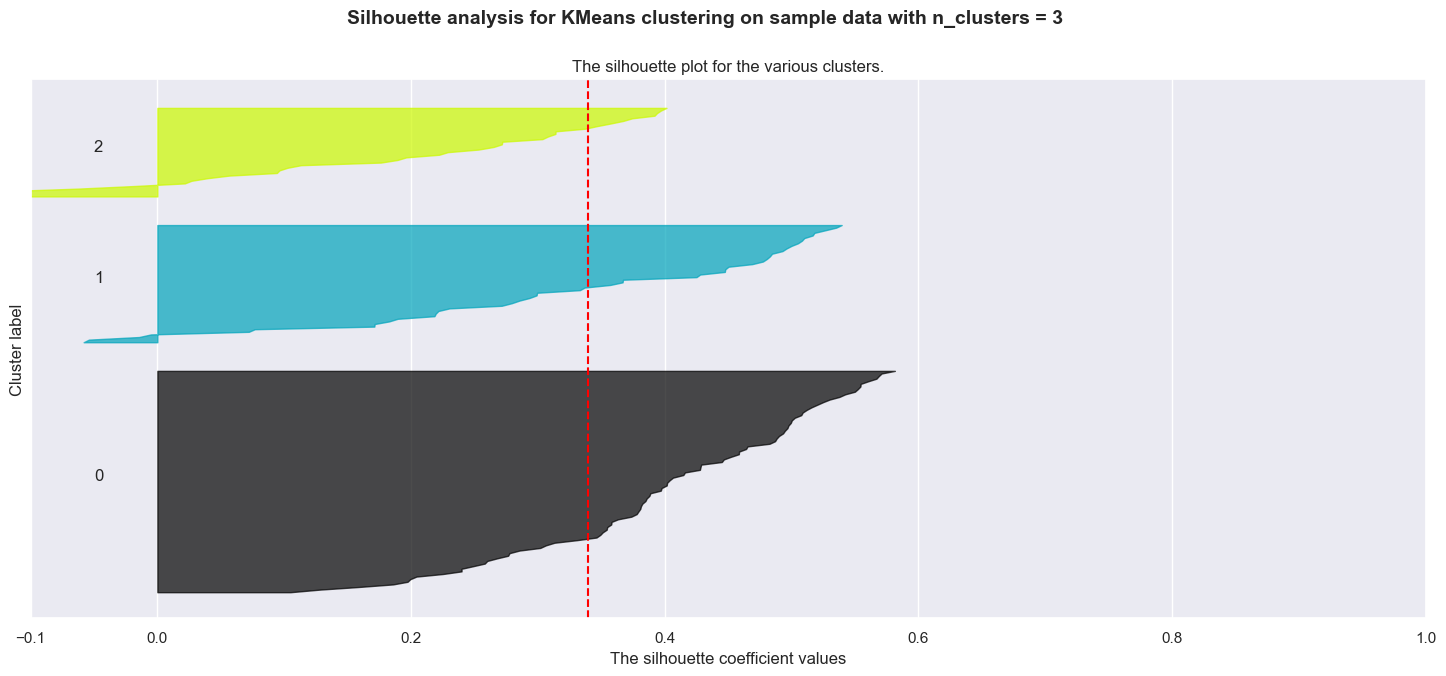

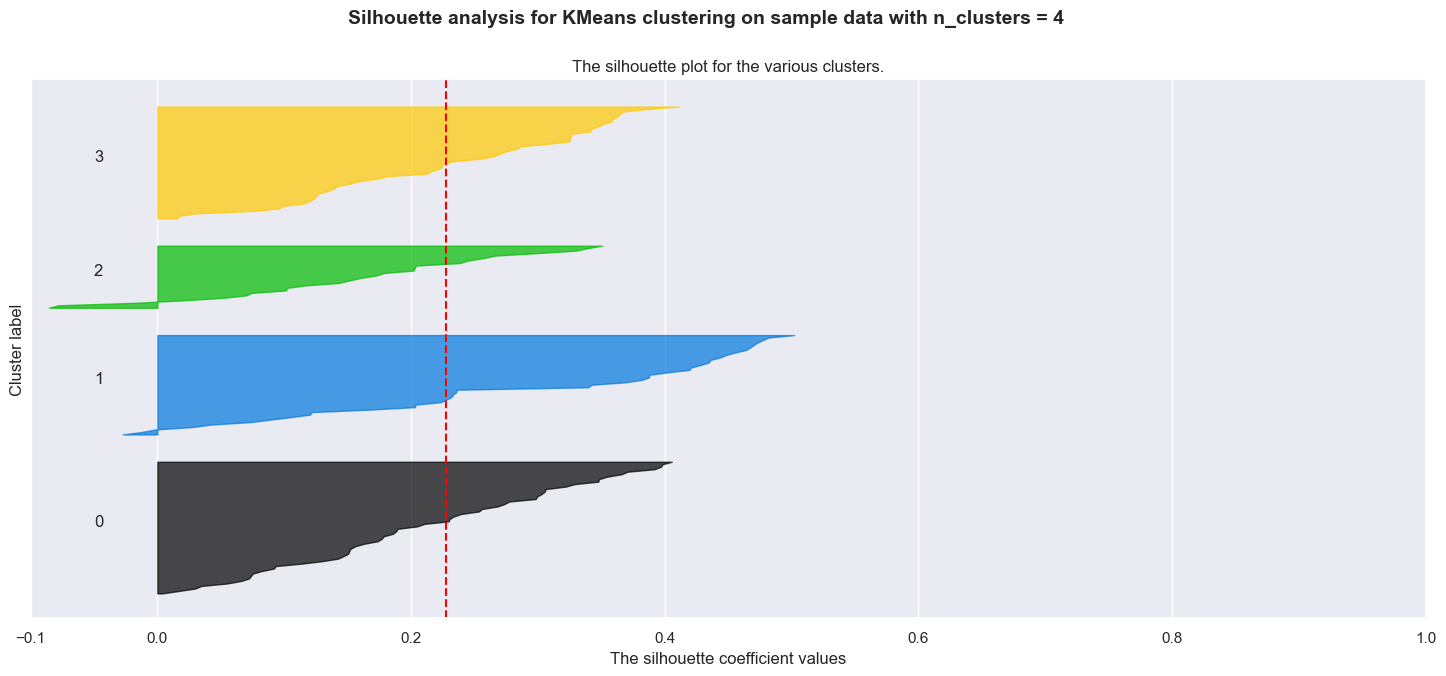

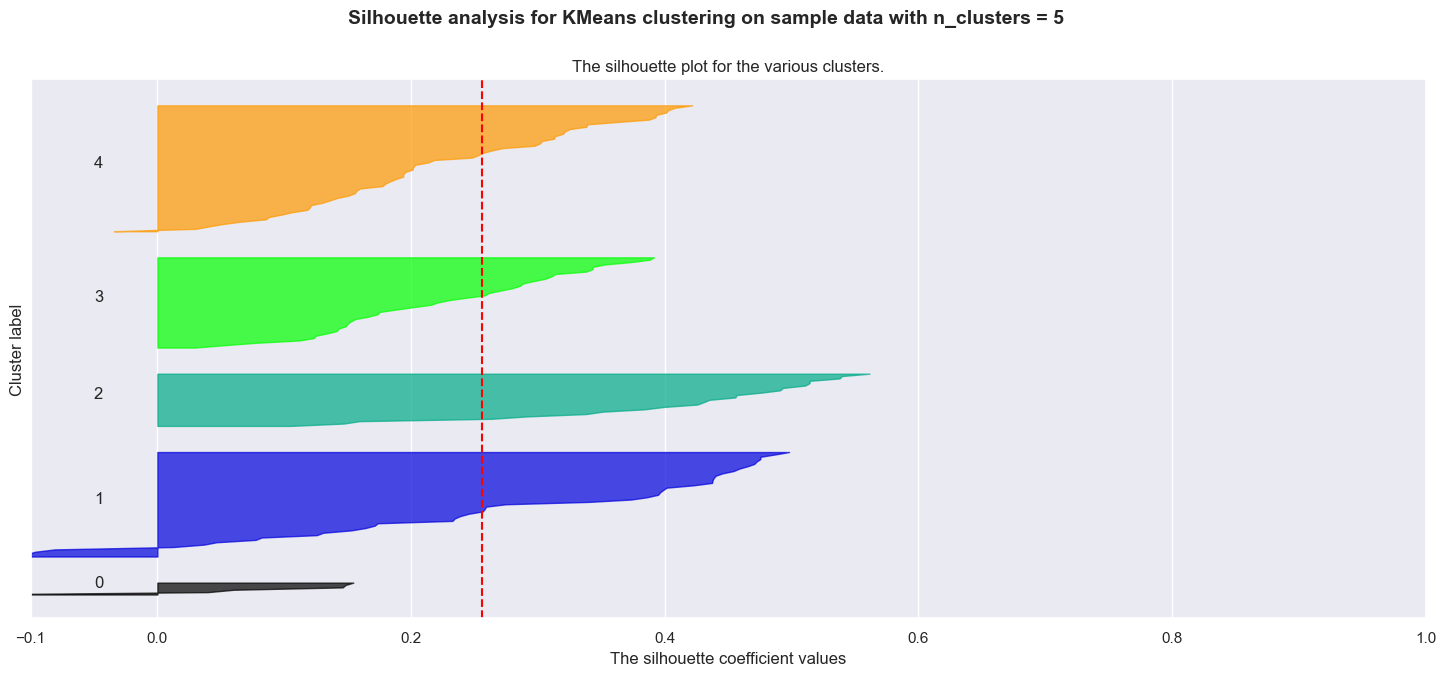

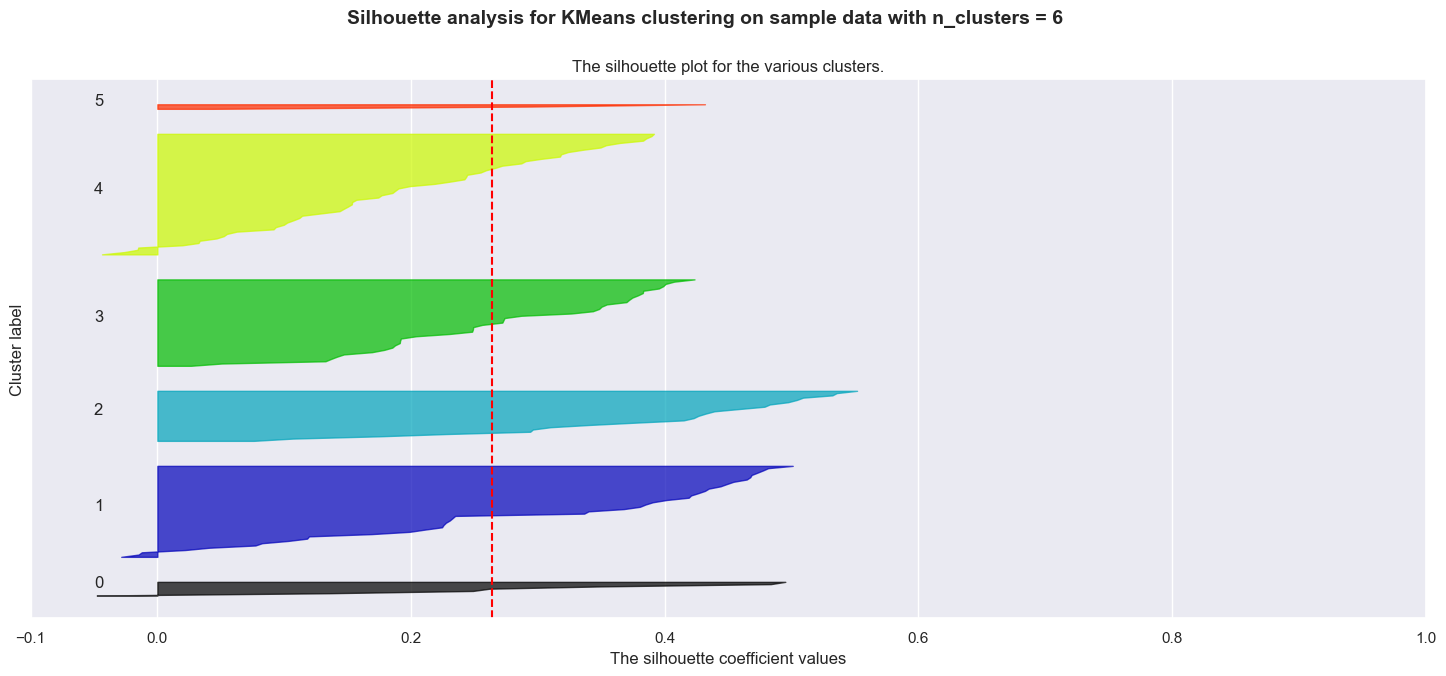

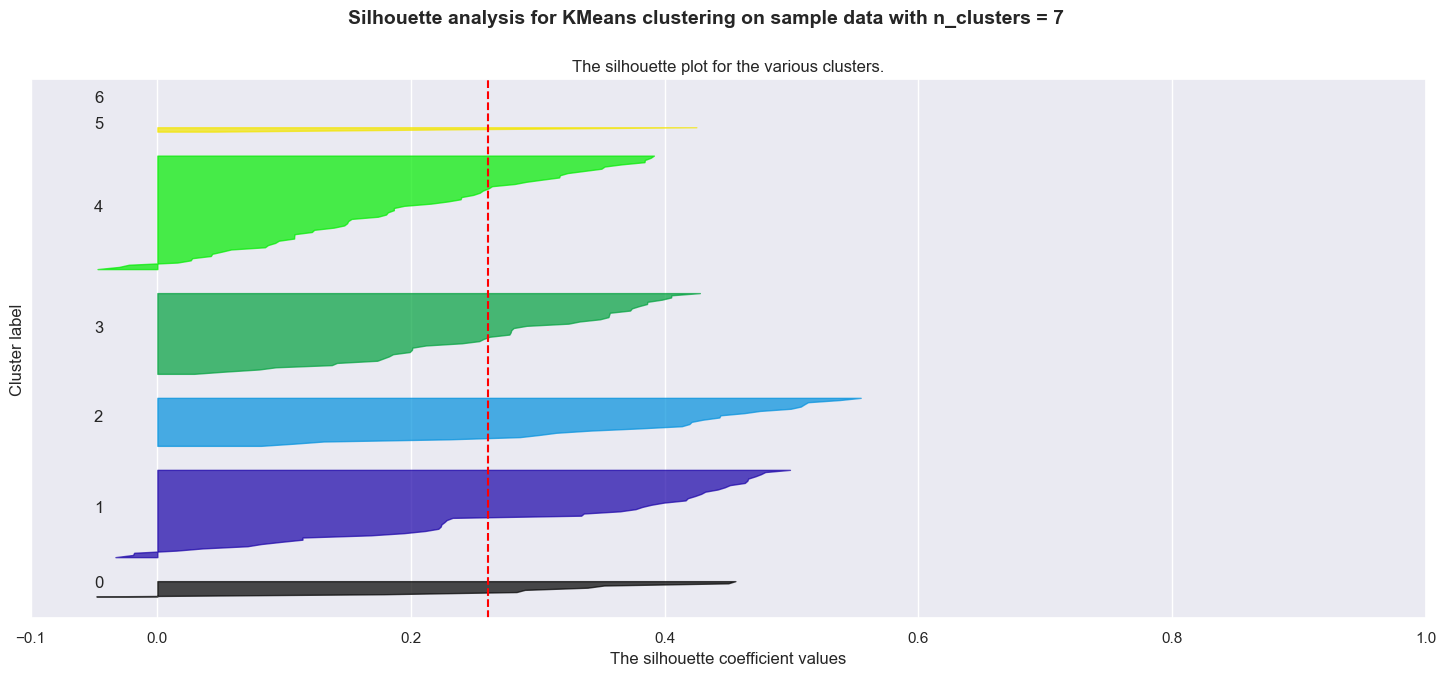

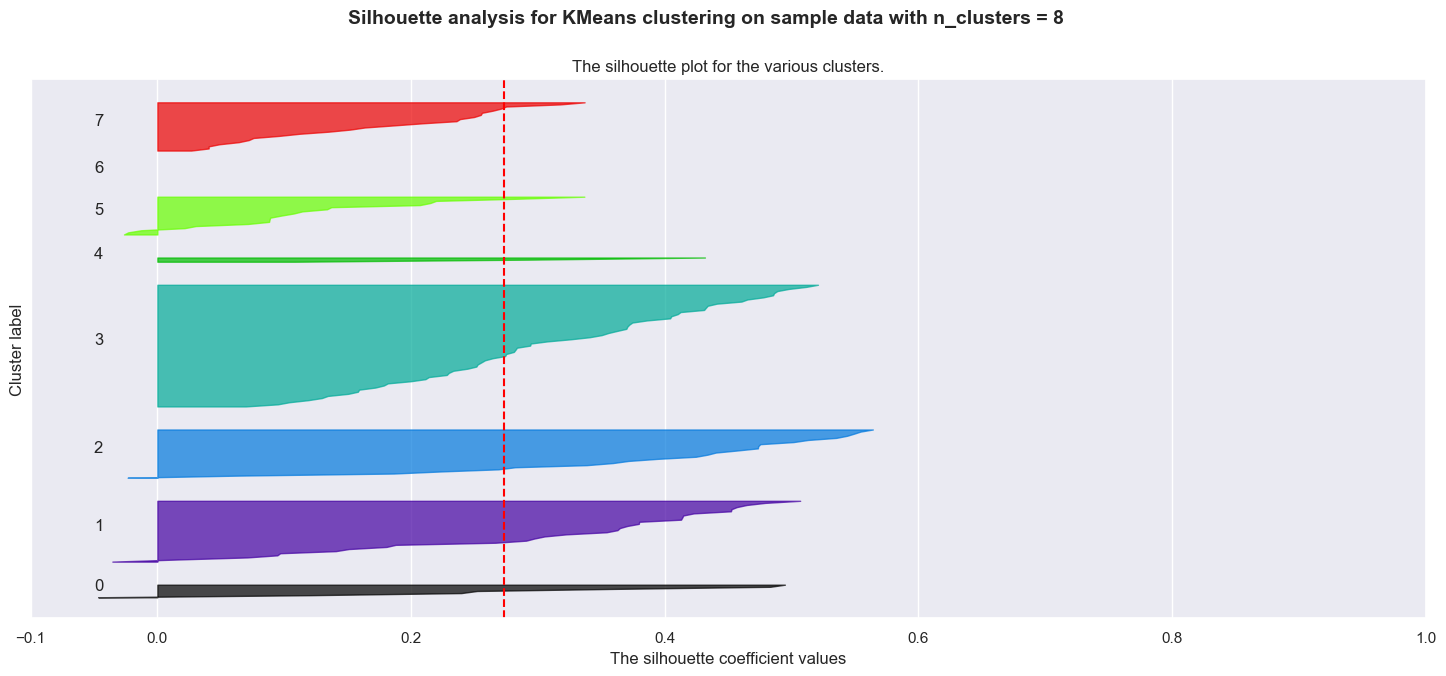

In [148]:
#silhoutee plotting
clusters = np.arange(2,9)

X = scaled_df
for n_clusters in clusters:
    
    clusterer = KMeans(n_clusters = n_clusters, n_init = 'auto', random_state = 42)
    
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots()
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
    

In [149]:
#using 4 as optimum clusters
kmeans = KMeans(n_clusters = 4,random_state = 42)
kmeans.fit(scaled_df)
# Adding predicted Labels to scaled data and original data
raw_df["kmean_groups"] = kmeans.predict(scaled_df)
raw_df["kmean_groups"].value_counts()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


kmean_groups
2    87
0    46
1    31
3     3
Name: count, dtype: int64

In [150]:
mean = raw_df.groupby('kmean_groups').mean()
new_groups = pd.DataFrame(mean)
new_groups

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
kmean_groups,,,,,,,,,
0,93.284783,29.287174,6.338478,43.297826,3516.804348,12.097065,59.393478,5.090217,1695.913043
1,4.903226,46.477419,9.127097,40.483871,44703.225806,2.607613,80.283871,1.786129,42574.193548
2,22.248276,40.795276,6.245172,47.286964,12913.678161,7.527138,72.616092,2.283333,6833.356322
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


In [153]:
#assinging country a group
pd.concat([raw_df['kmean_groups'], countries], axis = 'columns')

,kmean_groups,country
0,0,Afghanistan
1,2,Albania
2,2,Algeria
3,0,Angola
4,2,Antigua and Barbuda
...,...,...
162,2,Vanuatu
163,2,Venezuela
164,2,Vietnam
165,0,Yemen
